[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hartl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


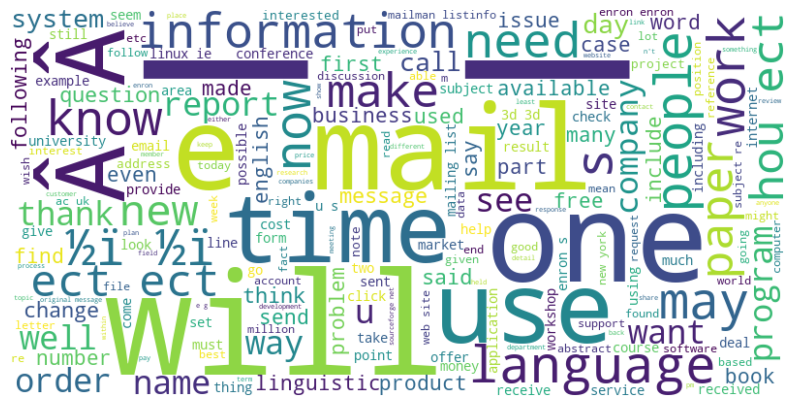

Email Text    18097
Email Type    18097
dtype: int64
Email Text    12667
Email Type    12667
dtype: int64
Email Text    5430
Email Type    5430
dtype: int64


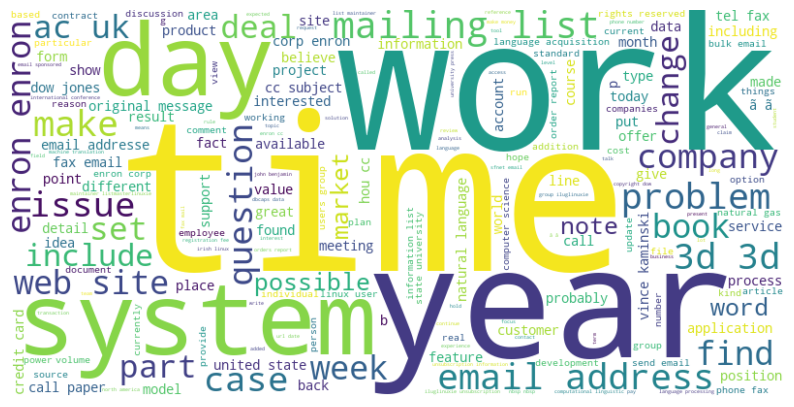

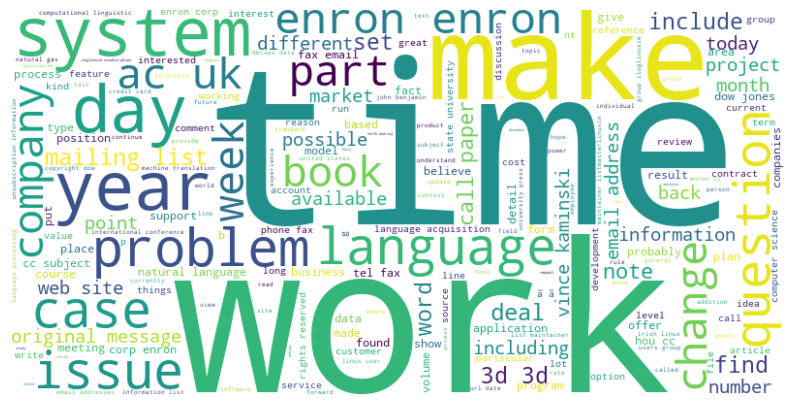

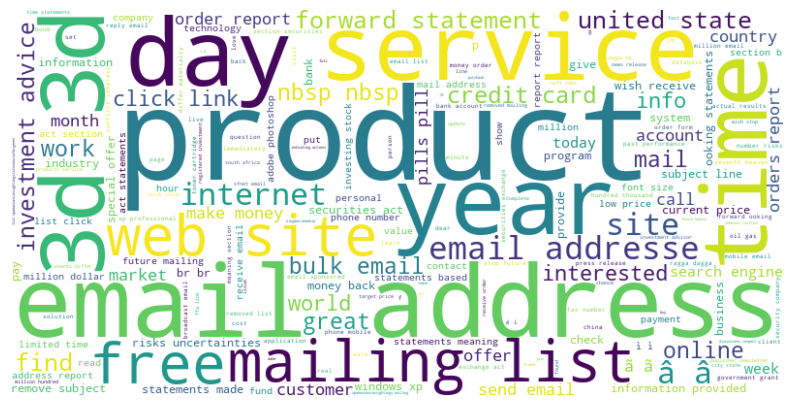

In [5]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Make sure to download the stopwords the first time you run this
nltk.download('stopwords')

df = pd.read_csv('../data/raw/phishing_emails.csv')
df['Email Text'] = df['Email Text'].fillna('')
df = df[~df['Email Text'].str.strip().isin(['', 'empty'])]
df.dropna(subset=["Email Text"])

dirty_text = " ".join(df['Email Text'])
dirty_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(dirty_text)

plt.figure(figsize=(10, 6))
plt.imshow(dirty_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Select only the Email Text and Email Type columns
df = df[['Email Text', 'Email Type']]

# Convert all text to lowercase
df['Email Text'] = df['Email Text'].str.lower()

# Define stop words
stop_words = set(stopwords.words())
stop_words.update({"â", "ï", "empty", "ect"})

# Function to clean text
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)  # Remove URLs
        text = text.replace("ï", "")
        text = text.replace("½", "")
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stop words
    return text

# Apply text cleaning
df['Email Text'] = df['Email Text'].apply(clean_text)

# Remove instances with empty strings, only whitespace, or the word "empty"
df['Email Text'] = df['Email Text'].fillna('')
df = df[~df['Email Text'].str.strip().isin(['', 'empty'])]
df.dropna(subset=["Email Text"])

# Split the data into 70% training and 30% test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Save the datasets to CSV files
print(df.count())
train_df.to_csv('../data/processed/train_emails.csv', index=False)
print(train_df.count())
test_df.to_csv('../data/processed/test_emails.csv', index=False)
print(test_df.count())
df.to_csv('../data/processed/all_emails.csv', index=False)

# Combine all the text data into a single string
text = " ".join(df['Email Text'])

safe_df = df[df['Email Type'] == 'Safe Email']
phishing_df = df[df['Email Type'] == 'Phishing Email']
safe_text = " ".join(safe_df['Email Text'])
phishing_text = " ".join(phishing_df['Email Text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
safe_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(safe_text)
phishing_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(phishing_text)

# Visualize the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(safe_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.figure(figsize=(10, 6))
plt.imshow(phishing_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()